<a href="https://colab.research.google.com/github/Ishan-Gijavanekar/IPL-Analysis/blob/main/IplMatchAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing tha data
This section deals with the data iomport and dropping the columns which are null and are not in use


In [4]:
df = pd.read_csv('matches.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.dropna(subset=['date'], inplace=True)

# Exploratory Data Analysis

This section will be the in depth analysis of the data related to the ipl conducted in the year 2017

# Team Performance

1.   Most successfull teams overall and per season
2.   Win percentage of the tams
3.   Win margin by runs or wickets



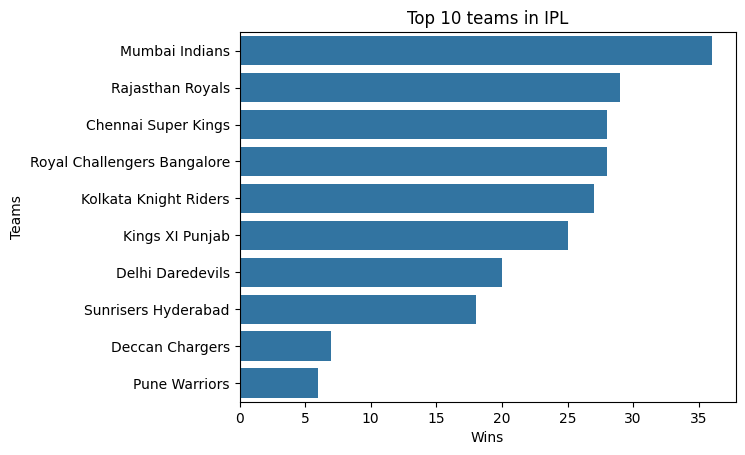

In [6]:
top_teams = df['winner'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title('Top 10 teams in IPL')
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.show()

# Toss Analysis

1. Toss win Vs. Match Win corelation
2. Toss desicion trends

In [7]:
toss_match_win = (df['toss_winner'] == df['winner']).mean()
print(f"Toss winner also the match winner: {toss_match_win}")

Toss winner also the match winner: 0.5191489361702127


# Venue Insights

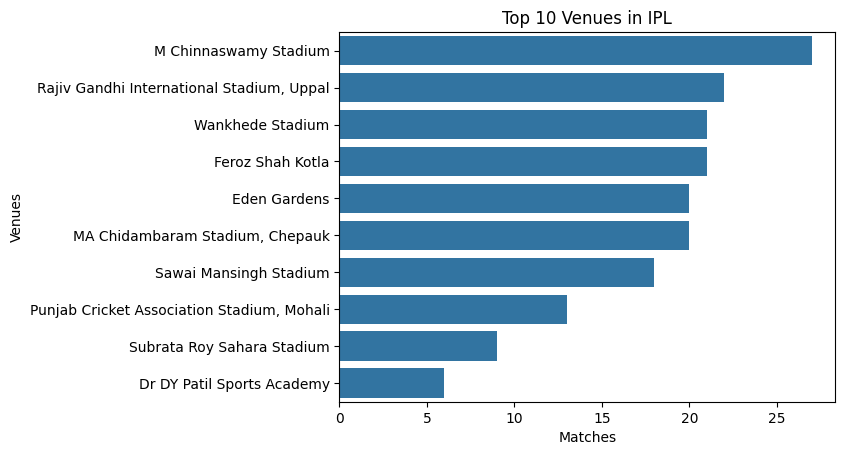

In [9]:
venue_counts = df['venue'].value_counts().head(10)
sns.barplot(x=venue_counts.values, y=venue_counts.index)
plt.title('Top 10 Venues in IPL')
plt.xlabel('Matches')
plt.ylabel('Venues')
plt.show()

# Player Analysis

Player of the match

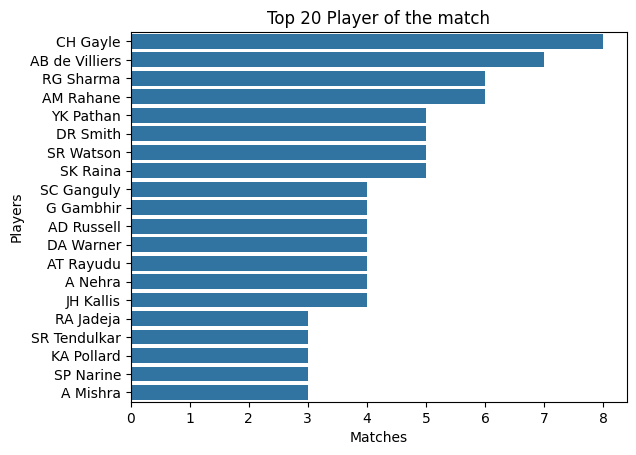

In [10]:
pom = df['player_of_match'].value_counts().head(20)
sns.barplot(x=pom.values, y=pom.index)
plt.title('Top 20 Player of the match')
plt.xlabel('Matches')
plt.ylabel('Players')
plt.show()

# Time Series and trends

1. Matches per season


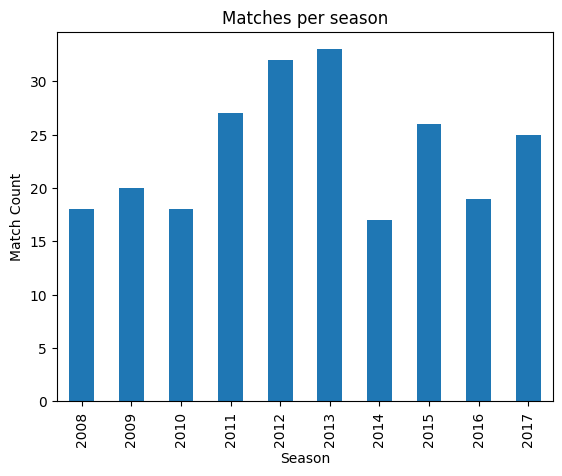

In [12]:
season_counts = df['season'].value_counts().sort_index()
season_counts.plot(kind='bar')
plt.title('Matches per season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.show()

Toss Desicion vs. Win margin

Text(0.5, 0, 'Toss Decision')

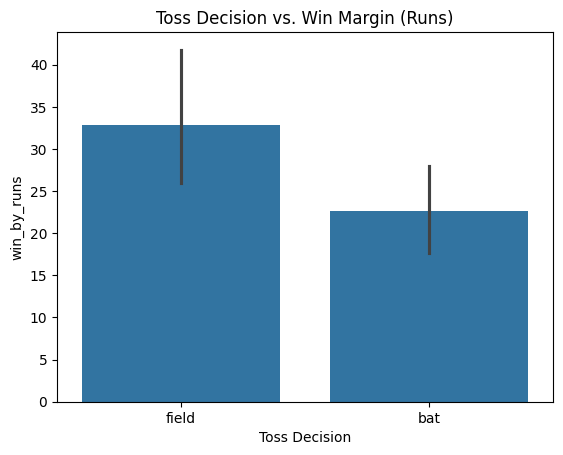

In [14]:
sns.barplot(x='toss_decision', y='win_by_runs', data=df[df['win_by_runs'] > 0])
plt.title('Toss Decision vs. Win Margin (Runs)')
plt.xlabel('Toss Decision')

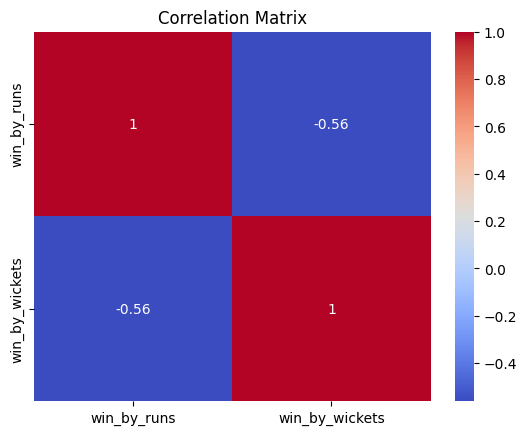

In [15]:
numeric_cols = df[['win_by_runs', 'win_by_wickets']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Win margin Distribution


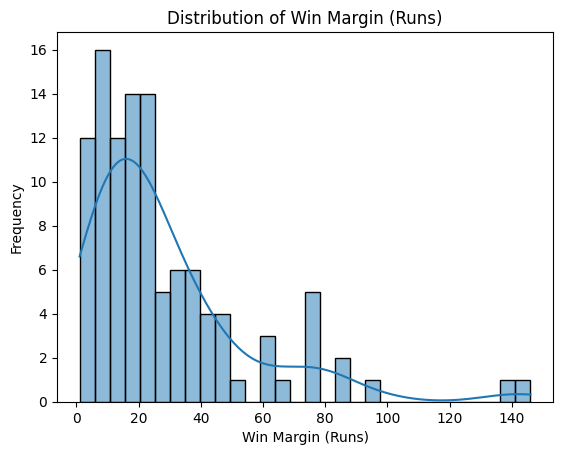

In [16]:
sns.histplot(df['win_by_runs'][df['win_by_runs'] > 0], bins=30, kde=True)
plt.title('Distribution of Win Margin (Runs)')
plt.xlabel('Win Margin (Runs)')
plt.ylabel('Frequency')
plt.show()

Head to head win ratios

In [17]:
df['matchup'] = df.apply(lambda x:'-'.join(sorted([x['team1'], x['team2']])), axis=1)
df['matchup'].value_counts().head(20)

,count
matchup,
Kings XI Punjab-Royal Challengers Bangalore,12
Kolkata Knight Riders-Royal Challengers Bangalore,10
Delhi Daredevils-Kolkata Knight Riders,10
Chennai Super Kings-Rajasthan Royals,9
Chennai Super Kings-Delhi Daredevils,9
Mumbai Indians-Royal Challengers Bangalore,9
Kings XI Punjab-Kolkata Knight Riders,8
Delhi Daredevils-Rajasthan Royals,8
Kings XI Punjab-Mumbai Indians,8
